In [1]:
import sys
sys.path.append("../../src")
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch.nn.functional as F

import glob
import os
from datetime import datetime
import time
import math
from tqdm import tqdm

from itertools import repeat
from torch.nn.parameter import Parameter
import collections
import matplotlib
from torch_utils import *
from ANN import MLP
from visualization import *
# matplotlib.use('Agg')

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [3]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), 
                                            torchvision.transforms.Normalize(mean=(0.4914, 0.4822, 0.4465), 
                                            std=(3*0.2023, 3*0.1994, 3*0.2010))])

cifar_dset_train = torchvision.datasets.CIFAR100('../../data', train=True, transform=transform, target_transform=None, download=True)
train_loader = torch.utils.data.DataLoader(cifar_dset_train, batch_size=20, shuffle=True, num_workers=0)

cifar_dset_test = torchvision.datasets.CIFAR100('../../data', train=False, transform=transform, target_transform=None, download=True)
test_loader = torch.utils.data.DataLoader(cifar_dset_test, batch_size=20, shuffle=False, num_workers=0)

Files already downloaded and verified
Files already downloaded and verified


In [7]:
device = "cuda"
criterion = torch.nn.MSELoss().to(device)
criterion = torch.nn.CrossEntropyLoss()
activation = F.relu
architecture = [int(32*32*3), 2000, 100]
model = MLP(architecture, activation = activation, final_layer_activation = False).to(device)

In [8]:
evaluateClassification(model, train_loader, "cuda")

Accuracy :	 0.00858


0.00858

In [9]:
# # specify optimizer (stochastic gradient descent) and learning rate
# optimizer = torch.optim.SGD(model.parameters(),lr = 0.001, momentum = 0.0)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
trn_acc_list = []
tst_acc_list = []

n_epochs = 20
for epoch_ in range(n_epochs):
    model.train()
    for idx, (x, y) in tqdm(enumerate(train_loader)):
        x, y = x.to(device), y.to(device)
        y_one_hot = F.one_hot(y, num_classes=model.nc)
        optimizer.zero_grad()
        y_hat = model(x)
        loss = criterion(y_hat,y)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
    trn_acc = evaluateClassification(model, train_loader, device, False)
    tst_acc = evaluateClassification(model, test_loader, device, False)
    trn_acc_list.append(trn_acc)
    tst_acc_list.append(tst_acc)
    
    print("Epoch : {}, Train Accuracy : {}, Test Accuracy : {}".format(epoch_+1, trn_acc, tst_acc))

2500it [00:21, 114.59it/s]
11it [00:00, 106.82it/s]

Epoch : 1, Train Accuracy : 0.1682, Test Accuracy : 0.1374


2500it [00:25, 98.48it/s] 
11it [00:00, 107.28it/s]

Epoch : 2, Train Accuracy : 0.21486, Test Accuracy : 0.1646


2500it [00:25, 96.42it/s] 
10it [00:00, 95.86it/s]

Epoch : 3, Train Accuracy : 0.24168, Test Accuracy : 0.1686


2500it [00:25, 99.04it/s] 
9it [00:00, 86.48it/s]

Epoch : 4, Train Accuracy : 0.27142, Test Accuracy : 0.175


2500it [00:26, 92.74it/s] 
8it [00:00, 72.49it/s]

Epoch : 5, Train Accuracy : 0.30712, Test Accuracy : 0.185


2500it [00:26, 92.72it/s] 
8it [00:00, 75.35it/s]

Epoch : 6, Train Accuracy : 0.32086, Test Accuracy : 0.185


2500it [00:27, 92.48it/s] 
10it [00:00, 91.71it/s]

Epoch : 7, Train Accuracy : 0.36632, Test Accuracy : 0.1994


2500it [00:27, 91.97it/s] 
9it [00:00, 83.68it/s]

Epoch : 8, Train Accuracy : 0.40748, Test Accuracy : 0.2126


2500it [00:24, 102.02it/s]
11it [00:00, 107.01it/s]

Epoch : 9, Train Accuracy : 0.42414, Test Accuracy : 0.208


2500it [00:23, 105.92it/s]
11it [00:00, 106.18it/s]

Epoch : 10, Train Accuracy : 0.4343, Test Accuracy : 0.1967


2500it [00:23, 105.73it/s]
10it [00:00, 98.53it/s]

Epoch : 11, Train Accuracy : 0.43782, Test Accuracy : 0.1962


2500it [00:23, 105.71it/s]
10it [00:00, 98.98it/s]

Epoch : 12, Train Accuracy : 0.483, Test Accuracy : 0.2055


2500it [00:27, 90.35it/s] 
14it [00:00, 130.84it/s]

Epoch : 13, Train Accuracy : 0.48022, Test Accuracy : 0.1921


2500it [00:14, 171.52it/s]
11it [00:00, 103.35it/s]

Epoch : 14, Train Accuracy : 0.51066, Test Accuracy : 0.209


2500it [00:22, 110.15it/s]
11it [00:00, 101.26it/s]

Epoch : 15, Train Accuracy : 0.53056, Test Accuracy : 0.2099


2500it [00:22, 110.99it/s]
9it [00:00, 85.88it/s]

Epoch : 16, Train Accuracy : 0.55216, Test Accuracy : 0.2025


2500it [00:22, 110.48it/s]
11it [00:00, 104.96it/s]

Epoch : 17, Train Accuracy : 0.5603, Test Accuracy : 0.2121


2500it [00:22, 110.13it/s]
11it [00:00, 107.33it/s]

Epoch : 18, Train Accuracy : 0.55914, Test Accuracy : 0.2017


2500it [00:22, 110.18it/s]
11it [00:00, 100.80it/s]

Epoch : 19, Train Accuracy : 0.58226, Test Accuracy : 0.204


2500it [00:22, 110.21it/s]


Epoch : 20, Train Accuracy : 0.59588, Test Accuracy : 0.209


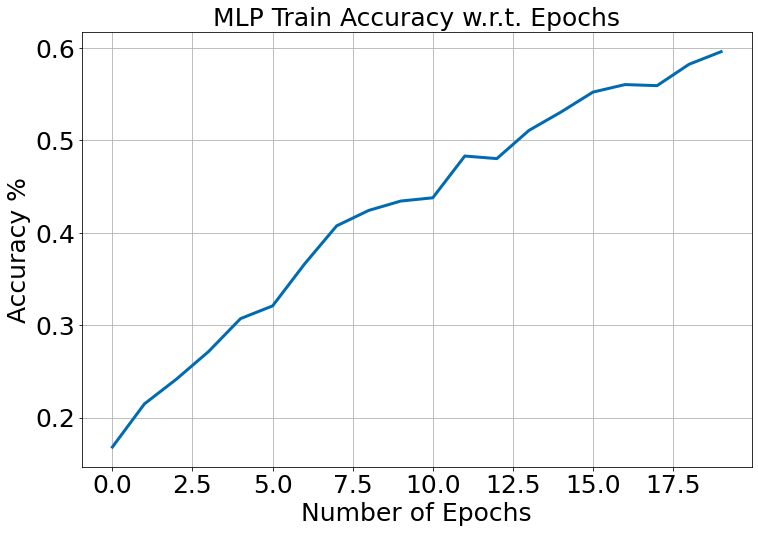

In [10]:
plot_convergence_plot(trn_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'MLP Train Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)

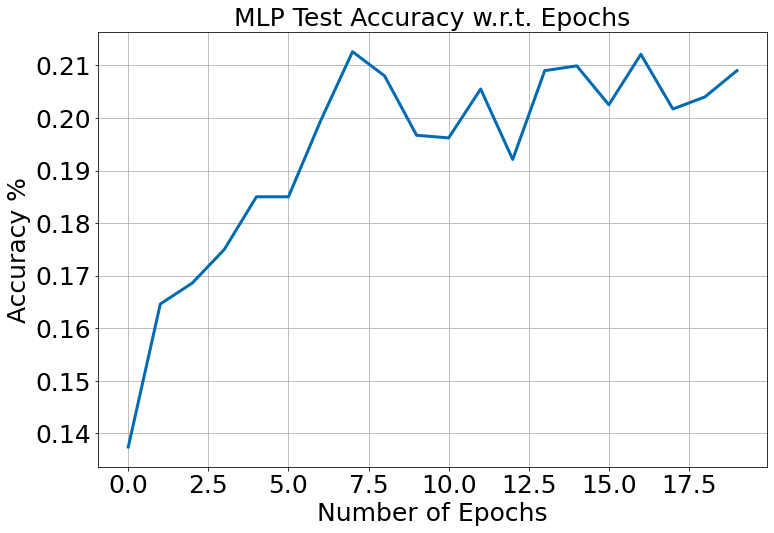

In [11]:
plot_convergence_plot(tst_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'MLP Test Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)